<a href="https://colab.research.google.com/github/jbreddy18/AI-Powered-real-time-haptic-feedback-system-to-ensure-the-correctness-of-the-workout-sessions/blob/main/fitness_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the folder containing all CSV files for exercises
csv_folder_path = '/content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset'

# List of exercise folders (sub-folders in the dataset)
exercise_folders = [
    'Basic_Armraises', 'Basic_Biceps_Curl', 'Basic_Overhead_press', 'Birdog',
    'Burpee_v1.0', 'Crunch_v1.0', 'Hammer_curl_v1.0',
    'Tricep_kickback_left_v1.0', 'Tricep_kickback_right_v1.0', 'V_up_v1.0'
]

# Dictionary to store data with the exercise label as key
exercise_data = {}

# Loop over each exercise folder and read CSV files
for exercise in exercise_folders:
    exercise_path = os.path.join(csv_folder_path, exercise)
    print(f"Processing exercise folder: {exercise_path}")

    # Check if the directory exists
    if not os.path.exists(exercise_path):
        print(f"Directory not found: {exercise_path}")
        continue

    # Initialize a list for this exercise's data
    all_data_for_exercise = []

    # Get all CSV files for each repetition in the exercise folder
    csv_files = [f for f in os.listdir(exercise_path) if f.endswith('.csv')]

    # Limit to reading only 100 csv files (optional)
    csv_files = csv_files[:100]

    # Load each CSV file and store it
    for csv_file in csv_files:
        csv_file_path = os.path.join(exercise_path, csv_file)
        try:
            data = pd.read_csv(csv_file_path)
            all_data_for_exercise.append(data.values)  # Store as NumPy array
        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {csv_file_path}")

    # Store the data for this exercise in the dictionary
    exercise_data[exercise] = all_data_for_exercise

# Now exercise_data contains the data for each exercise

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Basic_Armraises
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Basic_Biceps_Curl
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Basic_Overhead_press
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Birdog
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Burpee_v1.0
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Crunch_v1.0
Processing exercise folder: /content/drive/MyDr

In [ ]:
# check shape of exercise_data

for exercise_label, exercise_array in exercise_data.items():
  print(f"Exercise: {exercise_label}")
  for i, repetition_data in enumerate(exercise_array):
    print(f"Repetition {i+1} shape: {repetition_data.shape}")

Exercise: Basic_Armraises
Repetition 1 shape: (361, 14)
Repetition 2 shape: (347, 14)
Repetition 3 shape: (678, 14)
Repetition 4 shape: (516, 14)
Repetition 5 shape: (631, 14)
Repetition 6 shape: (282, 14)
Repetition 7 shape: (297, 14)
Repetition 8 shape: (876, 14)
Repetition 9 shape: (914, 14)
Repetition 10 shape: (625, 14)
Repetition 11 shape: (336, 14)
Repetition 12 shape: (776, 14)
Repetition 13 shape: (665, 14)
Repetition 14 shape: (802, 14)
Repetition 15 shape: (706, 14)
Repetition 16 shape: (771, 14)
Repetition 17 shape: (299, 14)
Repetition 18 shape: (714, 14)
Repetition 19 shape: (299, 14)
Repetition 20 shape: (541, 14)
Repetition 21 shape: (361, 14)
Repetition 22 shape: (361, 14)
Repetition 23 shape: (667, 14)
Repetition 24 shape: (383, 14)
Repetition 25 shape: (1076, 14)
Repetition 26 shape: (555, 14)
Repetition 27 shape: (336, 14)
Repetition 28 shape: (971, 14)
Repetition 29 shape: (661, 14)
Repetition 30 shape: (399, 14)
Repetition 31 shape: (316, 14)
Repetition 32 shape: 

In [ ]:
# how to get the labels print also

for exercise_label, exercise_array in exercise_data.items():
  print(f"Exercise: {exercise_label}")
  # Create labels for each repetition within the exercise
  labels = [exercise_label] * len(exercise_array)

  for i, (repetition_data, label) in enumerate(zip(exercise_array, labels)):
    print(f"Repetition {i+1} shape: {repetition_data.shape}, Label: {label}")

Exercise: Basic_Armraises
Repetition 1 shape: (361, 14), Label: Basic_Armraises
Repetition 2 shape: (347, 14), Label: Basic_Armraises
Repetition 3 shape: (678, 14), Label: Basic_Armraises
Repetition 4 shape: (516, 14), Label: Basic_Armraises
Repetition 5 shape: (631, 14), Label: Basic_Armraises
Repetition 6 shape: (282, 14), Label: Basic_Armraises
Repetition 7 shape: (297, 14), Label: Basic_Armraises
Repetition 8 shape: (876, 14), Label: Basic_Armraises
Repetition 9 shape: (914, 14), Label: Basic_Armraises
Repetition 10 shape: (625, 14), Label: Basic_Armraises
Repetition 11 shape: (336, 14), Label: Basic_Armraises
Repetition 12 shape: (776, 14), Label: Basic_Armraises
Repetition 13 shape: (665, 14), Label: Basic_Armraises
Repetition 14 shape: (802, 14), Label: Basic_Armraises
Repetition 15 shape: (706, 14), Label: Basic_Armraises
Repetition 16 shape: (771, 14), Label: Basic_Armraises
Repetition 17 shape: (299, 14), Label: Basic_Armraises
Repetition 18 shape: (714, 14), Label: Basic_Arm

In [ ]:
#labels shape

for exercise_label, exercise_array in exercise_data.items():
  print(f"Exercise: {exercise_label}")
  labels = [exercise_label] * len(exercise_array)
  print(f"Labels shape for {exercise_label}: {np.array(labels).shape}")

Exercise: Basic_Armraises
Labels shape for Basic_Armraises: (100,)
Exercise: Basic_Biceps_Curl
Labels shape for Basic_Biceps_Curl: (100,)
Exercise: Basic_Overhead_press
Labels shape for Basic_Overhead_press: (100,)
Exercise: Birdog
Labels shape for Birdog: (100,)
Exercise: Burpee_v1.0
Labels shape for Burpee_v1.0: (100,)
Exercise: Crunch_v1.0
Labels shape for Crunch_v1.0: (100,)
Exercise: Hammer_curl_v1.0
Labels shape for Hammer_curl_v1.0: (100,)
Exercise: Tricep_kickback_left_v1.0
Labels shape for Tricep_kickback_left_v1.0: (100,)
Exercise: Tricep_kickback_right_v1.0
Labels shape for Tricep_kickback_right_v1.0: (100,)
Exercise: V_up_v1.0
Labels shape for V_up_v1.0: (100,)


In [ ]:
# apply label encoding

from sklearn.preprocessing import LabelEncoder

# Create a list of all labels
all_labels = []
for exercise_label, exercise_array in exercise_data.items():
  all_labels.extend([exercise_label] * len(exercise_array))

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(all_labels)

# Now you have encoded labels corresponding to the exercise labels

# Print the mapping between original labels and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)


# Example usage: Access the encoded labels for a specific exercise
# for exercise_label, exercise_array in exercise_data.items():
#     print(f"Exercise: {exercise_label}")
#     encoded_exercise_labels = encoded_labels[ :len(exercise_array)]
#     print(f"Encoded labels for {exercise_label}: {encoded_exercise_labels}")

# You can now use these encoded labels for training your machine learning model.

Label Mapping:
{'Basic_Armraises': 0, 'Basic_Biceps_Curl': 1, 'Basic_Overhead_press': 2, 'Birdog': 3, 'Burpee_v1.0': 4, 'Crunch_v1.0': 5, 'Hammer_curl_v1.0': 6, 'Tricep_kickback_left_v1.0': 7, 'Tricep_kickback_right_v1.0': 8, 'V_up_v1.0': 9}


In [ ]:
# prompt: do train test split here

# Prepare data for training and testing
all_data = []
all_labels_encoded = []

for exercise_label, exercise_array in exercise_data.items():
  for repetition_data in exercise_array:
    all_data.append(repetition_data)
    all_labels_encoded.append(label_mapping[exercise_label])

In [ ]:
print(all_labels_encoded)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [ ]:
print(len(all_labels_encoded))

1000


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# ... (Your existing code for loading data) ...

X = []


for encoded_labels, exercise_array in exercise_data.items():
  for repetition_data in exercise_array:
    # Reshape repetition_data to have a consistent shape
    # Assuming all your repetition data has 14 columns,
    # you can pad or truncate rows to a fixed length (e.g., 329)
    repetition_data = repetition_data[:250, :]  # Truncate if more than 329 rows
    if repetition_data.shape[0] < 250:  # Pad with zeros if less than 329 rows
        padding_shape =(250 - repetition_data.shape[0], repetition_data.shape[1])
        padding = np.zeros(padding_shape)
        repetition_data = np.concatenate([repetition_data, padding])

    X.append(repetition_data)


# Convert to NumPy arrays
X = np.array(X)
y = np.array(all_labels_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

NameError: name 'all_labels_encoded' is not defined

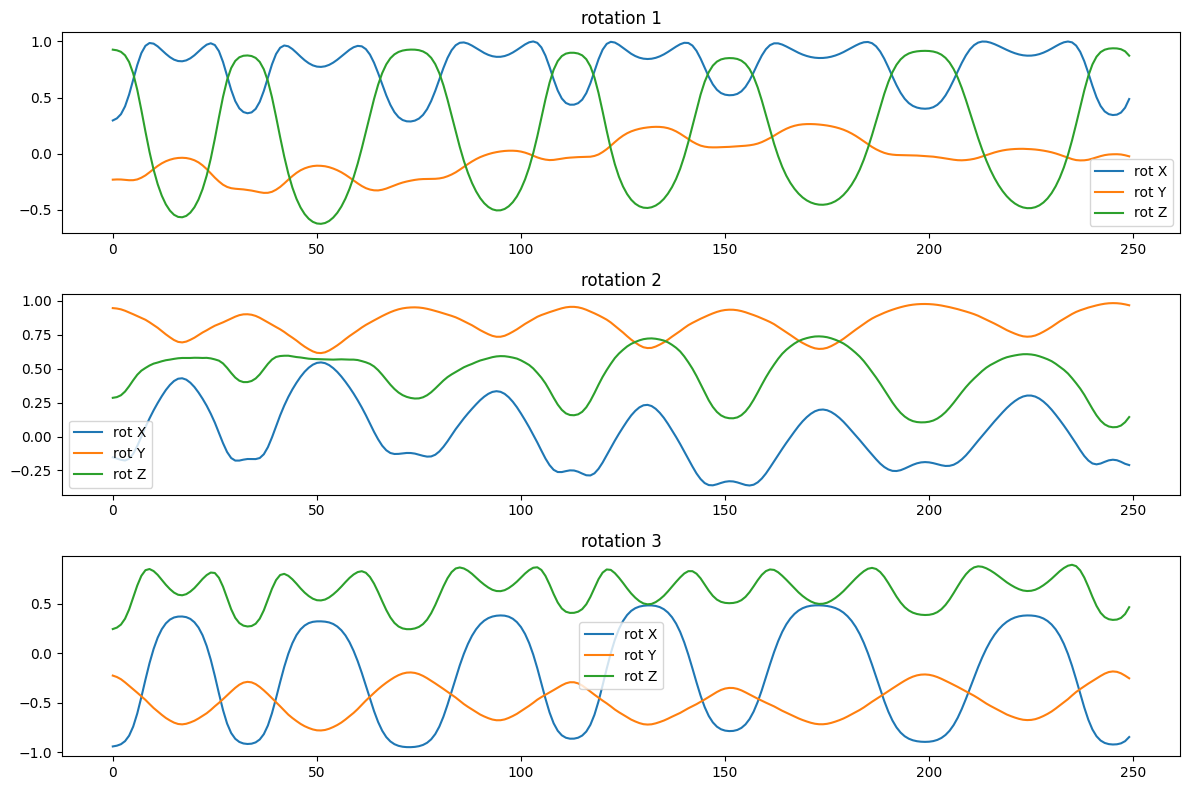

In [ ]:
# plot one sample of X_train

import matplotlib.pyplot as plt

# Assuming X_train has the shape (num_samples, sequence_length, num_features)
# Choose a sample to plot
sample_index = 0  # 20, 0, 15, 9 You can change this to plot a different sample

# Extract the data for the chosen sample
sample_data = X_train[sample_index]

# Assuming you have features like acceleration (x, y, z)
# You may need to adjust the column indices based on your data
# For example:
# acc_x = sample_data[:, 0]
# acc_y = sample_data[:, 1]
# acc_z = sample_data[:, 2]

# Assuming you have 14 columns, then use these for example
rot1_x = sample_data[:, 5]
rot1_y= sample_data[:, 6]
rot1_z = sample_data[:, 7]
rot2_x = sample_data[:, 8]
rot2_y = sample_data[:, 9]
rot2_z = sample_data[:, 10]
rot3_x = sample_data[:, 11]
rot3_y = sample_data[:, 12]
rot3_z = sample_data[:, 13]


# Create the plots
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(rot1_x, label='rot X')
plt.plot(rot1_y, label='rot Y')
plt.plot(rot1_z, label='rot Z')
plt.title('rotation 1')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(rot2_x, label='rot X')
plt.plot(rot2_y, label='rot Y')
plt.plot(rot2_z, label='rot Z')
plt.title('rotation 2')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(rot3_x, label='rot X')
plt.plot(rot3_y, label='rot Y')
plt.plot(rot3_z, label='rot Z')
plt.title('rotation 3')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.0806 - loss: 2.3702 - val_accuracy: 0.0750 - val_loss: 2.3060
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1624 - loss: 2.2670 - val_accuracy: 0.1875 - val_loss: 2.2173
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3024 - loss: 2.1046 - val_accuracy: 0.2937 - val_loss: 1.9698
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4243 - loss: 1.8092 - val_accuracy: 0.3812 - val_loss: 1.7358
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4479 - loss: 1.5438 - val_accuracy: 0.4875 - val_loss: 1.4903
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5109 - loss: 1.3766 - val_accuracy: 0.5125 - val_loss: 1.3906
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5640 - loss: 1.2222 - val_accuracy: 0.5437 - val_loss: 1.2529
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6431 - loss: 1.0689 - val_accuracy: 0.6062 - v

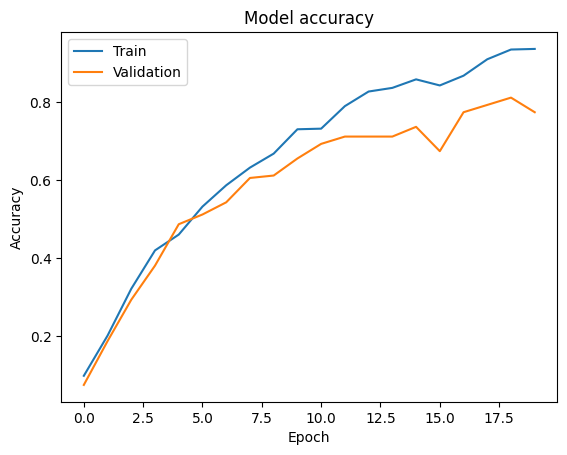

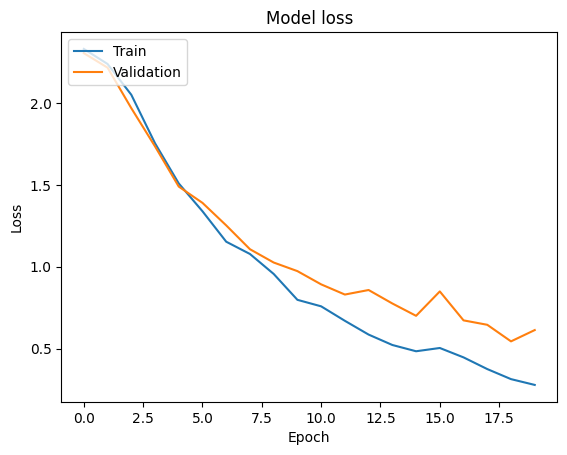

In [ ]:
# apply the bidirectional LSTM model

from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded vectors
num_classes = len(np.unique(y_train))
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# Define the Bidirectional LSTM model
model = models.Sequential()
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**MULTI-HEAD LSTM**

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.1618 - loss: 2.2534 - val_accuracy: 0.3250 - val_loss: 1.9611
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.3525 - loss: 1.8228 - val_accuracy: 0.4437 - val_loss: 1.5120
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.5569 - loss: 1.3362 - val_accuracy: 0.4938 - val_loss: 1.2129
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6171 - loss: 0.9954 - val_accuracy: 0.6562 - val_loss: 0.9627
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.7252 - loss: 0.7787 - val_accuracy: 0.6687 - val_loss: 0.8569
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.7552 - loss: 0.6558 - val_accuracy: 0.6750 - val_loss: 0.7595
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.8111 - loss: 0.5368 - val_accuracy: 0.7188 - val_loss: 0.6841
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8616 - loss: 0.4386 - val_accuracy: 0.781

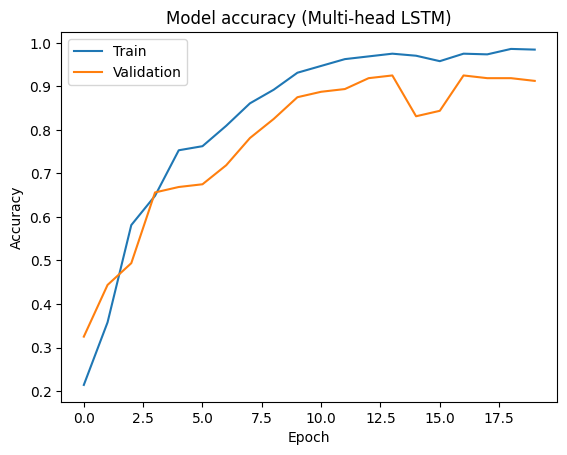

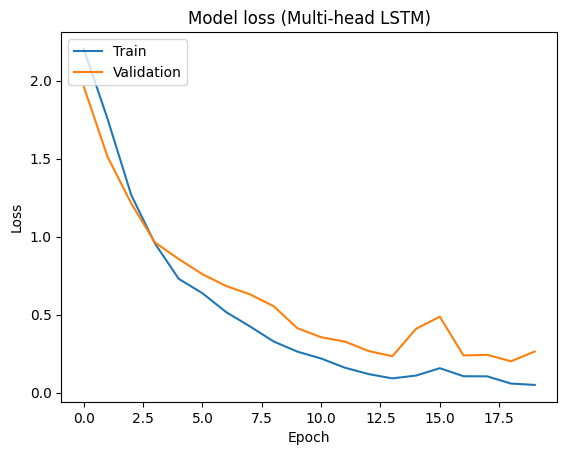

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Assuming X_train has the shape (num_samples, sequence_length, num_features)
# Assuming you have rotation data in columns 5-13 (rot1_x, rot1_y, rot1_z, rot2_x, rot2_y, rot2_z, rot3_x, rot3_y, rot3_z)

# Separate the rotation data into three separate inputs for each rotation matrix (rot1, rot2, rot3)
rot1_data = X_train[:, :, 5:8]  # Select columns 5-7 (rot1_x, rot1_y, rot1_z)
rot2_data = X_train[:, :, 8:11] # Select columns 8-10 (rot2_x, rot2_y, rot2_z)
rot3_data = X_train[:, :, 11:14] # Select columns 11-13 (rot3_x, rot3_y, rot3_z)

# Do the same for the test data
rot1_test = X_test[:, :, 5:8]
rot2_test = X_test[:, :, 8:11]
rot3_test = X_test[:, :, 11:14]

# Define the multi-head LSTM model
input_rot1 = tf.keras.Input(shape=(rot1_data.shape[1], rot1_data.shape[2]))
input_rot2 = tf.keras.Input(shape=(rot2_data.shape[1], rot2_data.shape[2]))
input_rot3 = tf.keras.Input(shape=(rot3_data.shape[1], rot3_data.shape[2]))

# Define LSTM layers for each rotation matrix
lstm_rot1 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(input_rot1)
lstm_rot1 = layers.Bidirectional(layers.LSTM(32))(lstm_rot1)

lstm_rot2 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(input_rot2)
lstm_rot2 = layers.Bidirectional(layers.LSTM(32))(lstm_rot2)

lstm_rot3 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(input_rot3)
lstm_rot3 = layers.Bidirectional(layers.LSTM(32))(lstm_rot3)

# Merge the outputs from the three LSTM heads
merged = layers.concatenate([lstm_rot1, lstm_rot2, lstm_rot3])

# Add a Dense layer for the final classification
dense = layers.Dense(64, activation='relu')(merged)
output = layers.Dense(num_classes, activation='softmax')(dense)

# Create the multi-head LSTM model
model_multihead = tf.keras.Model(inputs=[input_rot1, input_rot2, input_rot3], outputs=output)

# Compile the model
model_multihead.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model
history_multihead = model_multihead.fit([rot1_data, rot2_data, rot3_data], y_train_encoded,
                                        epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss_multihead, test_acc_multihead = model_multihead.evaluate([rot1_test, rot2_test, rot3_test], y_test_encoded)
print(f"Test accuracy (Multi-head LSTM): {test_acc_multihead}")

# Plot training and validation accuracy for the multi-head model
plt.plot(history_multihead.history['accuracy'])
plt.plot(history_multihead.history['val_accuracy'])
plt.title('Model accuracy (Multi-head LSTM)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss for the multi-head model
plt.plot(history_multihead.history['loss'])
plt.plot(history_multihead.history['val_loss'])
plt.title('Model loss (Multi-head LSTM)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Assuming X_train has the shape (num_samples, sequence_length, num_features)
# Assuming you have rotation data in columns 5-13 (rot1_x, rot1_y, rot1_z, rot2_x, rot2_y, rot2_z, rot3_x, rot3_y, rot3_z)

# Separate the rotation data into three separate inputs for each rotation matrix (rot1, rot2, rot3)
rot1_data = X_train[:, :, 5:8]  # Select columns 5-7 (rot1_x, rot1_y, rot1_z)
rot2_data = X_train[:, :, 8:11] # Select columns 8-10 (rot2_x, rot2_y, rot2_z)
rot3_data = X_train[:, :, 11:14] # Select columns 11-13 (rot3_x, rot3_y, rot3_z)

# Do the same for the test data
rot1_test = X_test[:, :, 5:8]
rot2_test = X_test[:, :, 8:11]
rot3_test = X_test[:, :, 11:14]

# Define the multi-head LSTM model
input_rot1 = tf.keras.Input(shape=(rot1_data.shape[1], rot1_data.shape[2]))
input_rot2 = tf.keras.Input(shape=(rot2_data.shape[1], rot2_data.shape[2]))
input_rot3 = tf.keras.Input(shape=(rot3_data.shape[1], rot3_data.shape[2]))

# Define LSTM layers for each rotation matrix
lstm_rot1 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(input_rot1)
lstm_rot1 = layers.Bidirectional(layers.LSTM(32))(lstm_rot1)

lstm_rot2 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(input_rot2)
lstm_rot2 = layers.Bidirectional(layers.LSTM(32))(lstm_rot2)

lstm_rot3 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(input_rot3)
lstm_rot3 = layers.Bidirectional(layers.LSTM(32))(lstm_rot3)

# Merge the outputs from the three LSTM heads
merged = layers.concatenate([lstm_rot1, lstm_rot2, lstm_rot3])

# Add a Dense layer for the final classification
dense = layers.Dense(64, activation='relu')(merged)
output = layers.Dense(num_classes, activation='softmax')(dense)

# Create the multi-head LSTM model
model_multihead = tf.keras.Model(inputs=[input_rot1, input_rot2, input_rot3], outputs=output)

# Compile the model
model_multihead.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model
history_multihead = model_multihead.fit([rot1_data, rot2_data, rot3_data], y_train_encoded,
                                        epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss_multihead, test_acc_multihead = model_multihead.evaluate([rot1_test, rot2_test, rot3_test], y_test_encoded)
print(f"Test accuracy (Multi-head LSTM): {test_acc_multihead}")

# Plot training and validation accuracy for the multi-head model
plt.plot(history_multihead.history['accuracy'])
plt.plot(history_multihead.history['val_accuracy'])
plt.title('Model accuracy (Multi-head LSTM)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss for the multi-head model
plt.plot(history_multihead.history['loss'])
plt.plot(history_multihead.history['val_loss'])
plt.title('Model loss (Multi-head LSTM)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
model.summary()

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Define the number of folds for cross-validation
num_folds = 5

# Prepare data (if not already prepared)
X = np.array(X)  # Input data
y = np.array(all_labels_encoded)  # Encoded labels

# One-hot encode the labels
num_classes = len(np.unique(y))
y_encoded = to_categorical(y, num_classes=num_classes)

# Initialize KFold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Store accuracy for each fold
fold_accuracies = []a

# 5-Fold Cross Validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y_encoded)):
    print(f"Training fold {fold + 1}/{num_folds}...")

    # Split data into training and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # Define the Bidirectional LSTM model
    model = models.Sequential()
    model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(layers.Bidirectional(layers.LSTM(32)))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the current fold
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation Accuracy for Fold {fold + 1}: {val_acc:.4f}")

    # Append the validation accuracy to the list
    fold_accuracies.append(val_acc)

# Calculate and print the average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Validation Accuracy across {num_folds} folds: {average_accuracy:.4f}")

# Plot training and validation accuracy for each fold
for fold, history in enumerate(history.history['accuracy']):
    plt.plot(history, label=f'Fold {fold + 1} Train Accuracy')

plt.title('Model Accuracy Across Folds')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot the validation accuracy for each fold
for fold, history in enumerate(history.history['val_accuracy']):
    plt.plot(history, label=f'Fold {fold + 1} Validation Accuracy')

plt.title('Model Validation Accuracy Across Folds')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


NameError: name 'X' is not defined

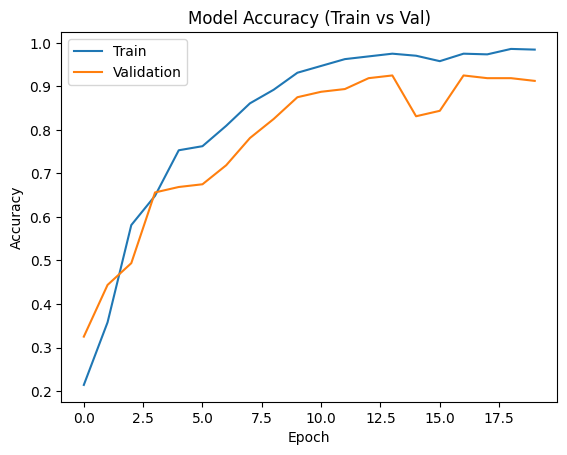

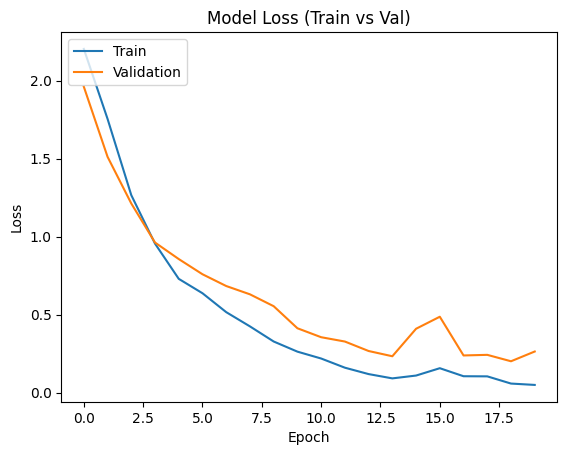

In [ ]:
# Plot training and validation accuracy for the multi-head model
plt.plot(history_multihead.history['accuracy'])
plt.plot(history_multihead.history['val_accuracy'])
plt.title('Model Accuracy (Train vs Val)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss for the multi-head model
plt.plot(history_multihead.history['loss'])
plt.plot(history_multihead.history['val_loss'])
plt.title('Model Loss (Train vs Val)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**5 FOLD CROSS VALIDATION ACCURACY **

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Basic_Armraises
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Basic_Biceps_Curl
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Basic_Overhead_press
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Birdog
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Burpee_v1.0
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Crunch_v1.0
Processing exercise folder: /content/drive/MyDr

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.1163 - loss: 2.3148 - val_accuracy: 0.1650 - val_loss: 2.2548
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.2445 - loss: 2.1489 - val_accuracy: 0.2900 - val_loss: 1.9570
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3388 - loss: 1.7582 - val_accuracy: 0.4050 - val_loss: 1.6831
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4762 - loss: 1.4929 - val_accuracy: 0.4300 - val_loss: 1.4449
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5082 - loss: 1.3767 - val_accuracy: 0.4800 - val_loss: 1.3012
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5727 - loss: 1.1904 - val_accuracy: 0.5750 - val_loss: 1.1496
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6129 - loss: 1.1064 - val_accuracy: 0.5150 - val_loss: 1.1734
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6307 - loss: 1.0218 - val_accuracy: 0.5750 - val_loss: 1.

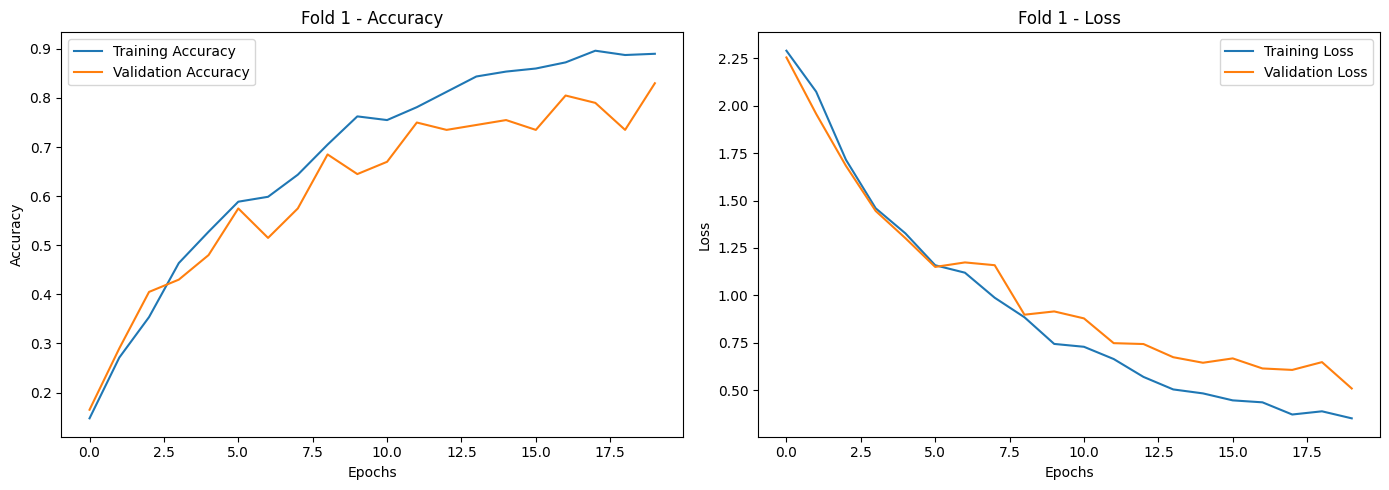

Training Fold 2...
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.1213 - loss: 2.2949 - val_accuracy: 0.1500 - val_loss: 2.2131
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.2591 - loss: 2.1141 - val_accuracy: 0.3350 - val_loss: 1.8542
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3588 - loss: 1.8203 - val_accuracy: 0.5200 - val_loss: 1.5253
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4477 - loss: 1.5597 - val_accuracy: 0.5850 - val_loss: 1.2725
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5800 - loss: 1.2520 - val_accuracy: 0.6100 - val_loss: 1.1333
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5816 - loss: 1.1454 - val_accuracy: 0.6250 - val_loss: 0.9866
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6635 - loss: 0.9427 - val_accuracy: 0.7050 - val_loss: 0.8472
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6824 - loss: 0.9113 - val_a

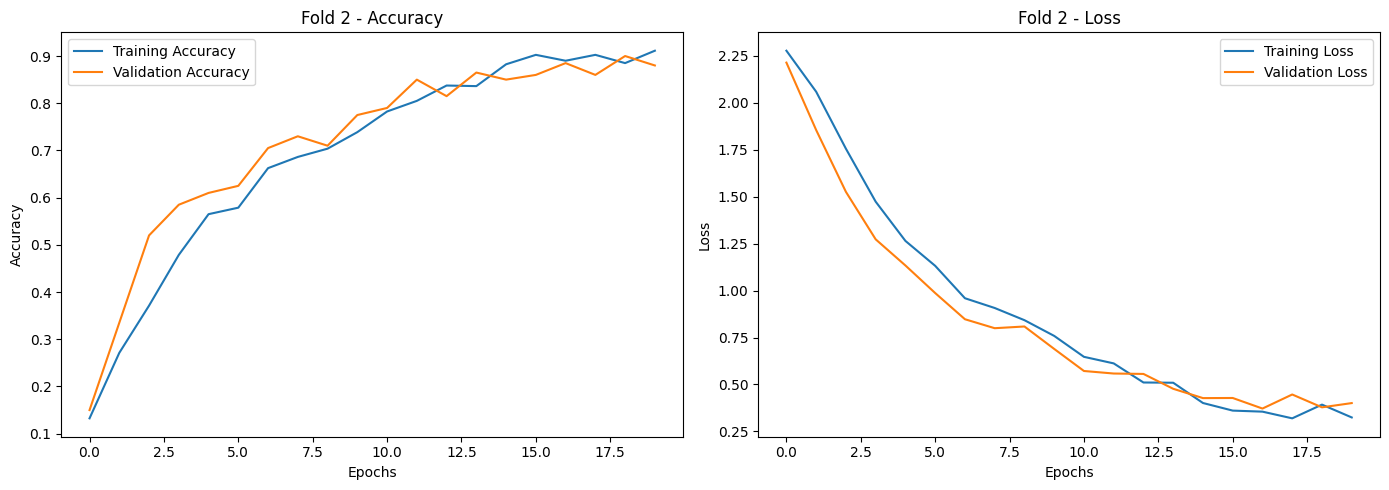

Training Fold 3...
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.1179 - loss: 2.2978 - val_accuracy: 0.2200 - val_loss: 2.1699
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.2986 - loss: 2.0697 - val_accuracy: 0.3500 - val_loss: 1.7927
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4129 - loss: 1.7094 - val_accuracy: 0.4750 - val_loss: 1.4912
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5089 - loss: 1.4091 - val_accuracy: 0.5150 - val_loss: 1.2467
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6002 - loss: 1.1928 - val_accuracy: 0.5800 - val_loss: 1.1312
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6323 - loss: 1.0349 - val_accuracy: 0.5450 - val_loss: 1.1221
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6433 - loss: 0.9949 - val_accuracy: 0.6000 - val_loss: 1.0975
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6809 - loss: 0.9022 - val_a

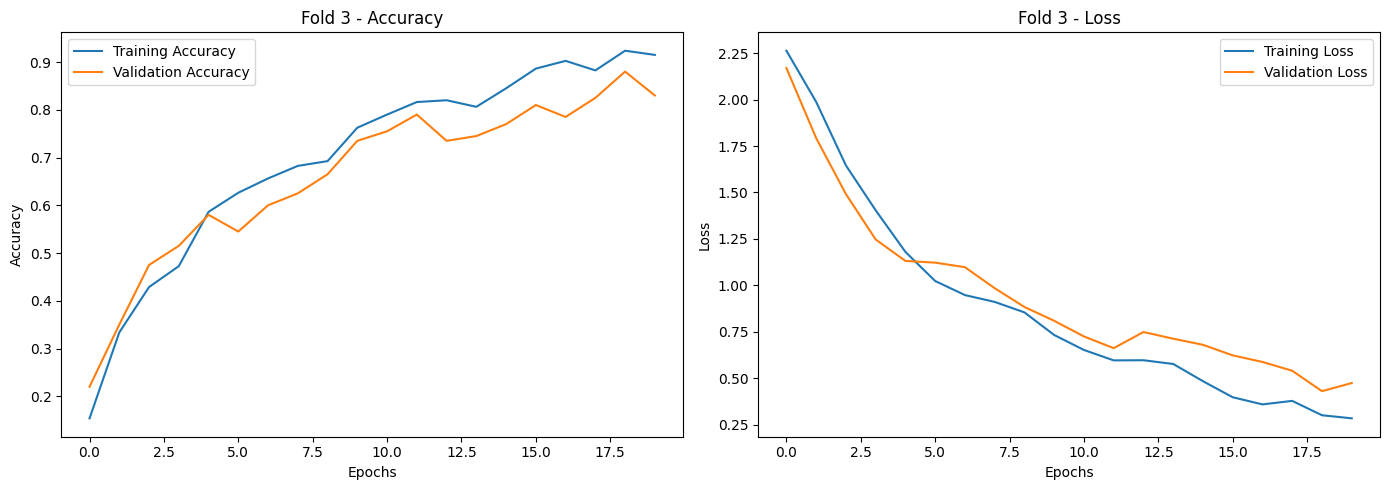

Training Fold 4...
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.1286 - loss: 2.2949 - val_accuracy: 0.0950 - val_loss: 2.2451
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.2189 - loss: 2.1158 - val_accuracy: 0.1750 - val_loss: 1.9436
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3674 - loss: 1.7615 - val_accuracy: 0.3100 - val_loss: 1.8095
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4808 - loss: 1.4521 - val_accuracy: 0.3900 - val_loss: 1.4922
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5695 - loss: 1.1856 - val_accuracy: 0.4800 - val_loss: 1.3483
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5951 - loss: 1.1143 - val_accuracy: 0.4900 - val_loss: 1.2255
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6598 - loss: 0.9511 - val_accuracy: 0.5500 - val_loss: 1.1673
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7300 - loss: 0.8118 - val_a

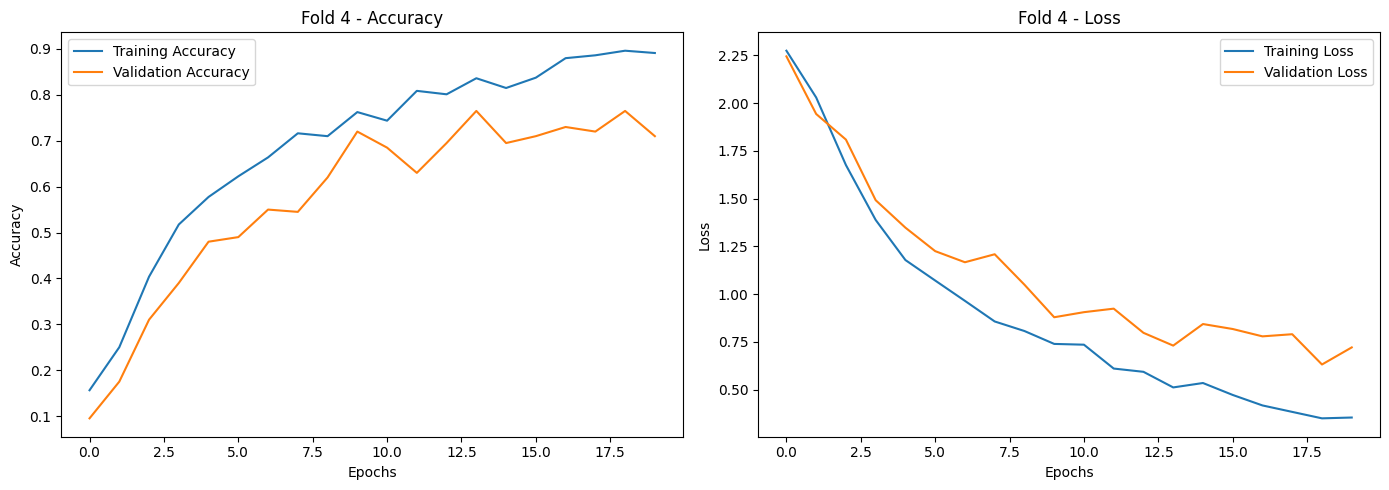

Training Fold 5...
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.0940 - loss: 2.3151 - val_accuracy: 0.2150 - val_loss: 2.2456
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.2279 - loss: 2.1620 - val_accuracy: 0.2300 - val_loss: 2.1079
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3561 - loss: 1.8942 - val_accuracy: 0.3600 - val_loss: 1.6815
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4739 - loss: 1.5180 - val_accuracy: 0.5200 - val_loss: 1.3962
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6112 - loss: 1.2019 - val_accuracy: 0.5000 - val_loss: 1.2730
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6435 - loss: 1.0521 - val_accuracy: 0.5600 - val_loss: 1.2250
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6385 - loss: 0.9803 - val_accuracy: 0.6550 - val_loss: 1.0158
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6960 - loss: 0.8462 - val_a

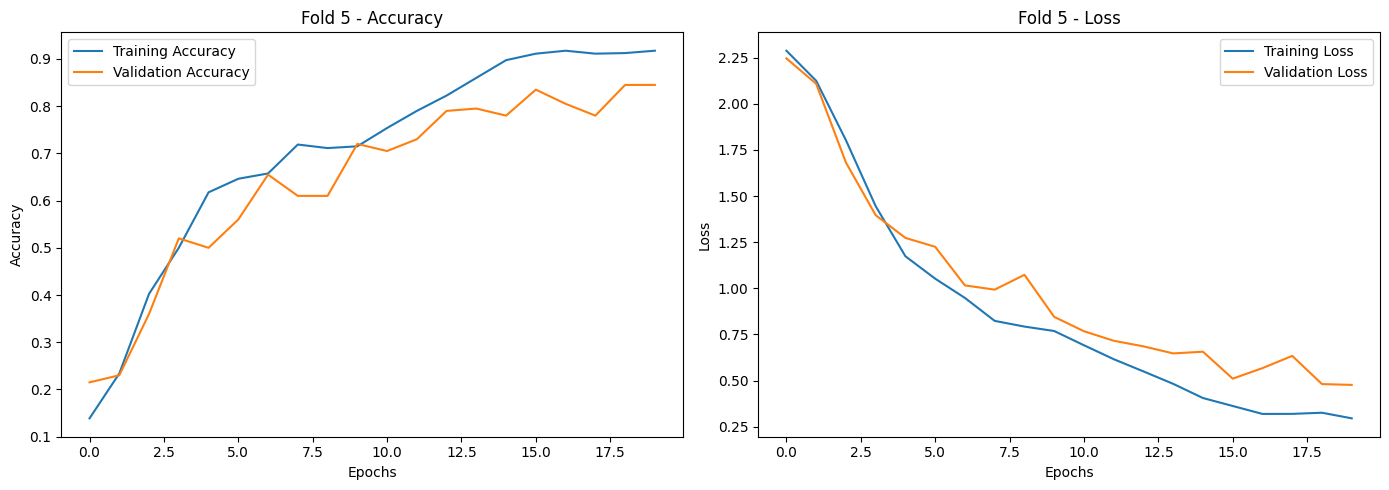

Average validation accuracy across folds: 0.818999993801117
Standard deviation of validation accuracy: 0.057480439889471206


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the folder containing all CSV files for exercises
csv_folder_path = '/content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset'

# List of exercise folders (sub-folders in the dataset)
exercise_folders = [
    'Basic_Armraises', 'Basic_Biceps_Curl', 'Basic_Overhead_press', 'Birdog',
    'Burpee_v1.0', 'Crunch_v1.0', 'Hammer_curl_v1.0',
    'Tricep_kickback_left_v1.0', 'Tricep_kickback_right_v1.0', 'V_up_v1.0'
]

# Dictionary to store data with the exercise label as key
exercise_data = {}

# Loop over each exercise folder and read CSV files
for exercise in exercise_folders:
    exercise_path = os.path.join(csv_folder_path, exercise)
    print(f"Processing exercise folder: {exercise_path}")

    # Check if the directory exists
    if not os.path.exists(exercise_path):
        print(f"Directory not found: {exercise_path}")
        continue

    # Initialize a list for this exercise's data
    all_data_for_exercise = []

    # Get all CSV files for each repetition in the exercise folder
    csv_files = [f for f in os.listdir(exercise_path) if f.endswith('.csv')]

    # Limit to reading only 100 csv files
    csv_files = csv_files[:100]

    # Load each CSV file and store it
    for csv_file in csv_files:
        csv_file_path = os.path.join(exercise_path, csv_file)
        try:
            data = pd.read_csv(csv_file_path)
            all_data_for_exercise.append(data.values)  # Store as NumPy array
        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {csv_file_path}")

    # Store the data for this exercise in the dictionary
    exercise_data[exercise] = all_data_for_exercise

# Label Encoding for exercise labels
all_labels = []
for exercise_label in exercise_data.keys():
    all_labels.extend([exercise_label] * len(exercise_data[exercise_label]))

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(all_labels)

# Prepare the data (X) and labels (y)
X = []
for exercise_label, exercise_array in exercise_data.items():
    for repetition_data in exercise_array:
        # Pad or truncate repetition data to 250 time steps
        if repetition_data.shape[0] < 250:
            padding_shape = (250 - repetition_data.shape[0], repetition_data.shape[1])
            repetition_data = np.concatenate([repetition_data, np.zeros(padding_shape)])
        elif repetition_data.shape[0] > 250:
            repetition_data = repetition_data[:250, :]  # Truncate if more than 250 time steps

        X.append(repetition_data)

# Convert to numpy arrays
X = np.array(X)
y = np.array(encoded_labels)

# Reshape X to fit the model input shape (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Define the Bidirectional LSTM model
def create_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=input_shape))
    model.add(layers.Bidirectional(layers.LSTM(32)))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize KFold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Convert labels to one-hot encoded vectors for all splits
num_classes = len(np.unique(y))
y_encoded = to_categorical(y, num_classes=num_classes)

# Store fold results
fold_accuracies = []
fold_losses = []

# K-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Training Fold {fold + 1}...")

    # Split data into training and validation for this fold
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # Create and compile model for this fold
    model = create_model(X_train.shape[1:], num_classes)

    # Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_val, y_val)
    print(f"Validation Accuracy for Fold {fold + 1}: {val_acc}")
    fold_accuracies.append(val_acc)
    fold_losses.append(val_loss)

    # Plot training and validation accuracy
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold + 1} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold + 1} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Final cross-validation results
print(f"Average validation accuracy across folds: {np.mean(fold_accuracies)}")
print(f"Standard deviation of validation accuracy: {np.std(fold_accuracies)}")


Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Basic_Armraises
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Basic_Biceps_Curl
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Basic_Overhead_press
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Birdog
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Burpee_v1.0
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Crunch_v1.0
Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Hammer_curl_v1.0
Processing exercise folder: /content

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.1262 - loss: 2.2559 - val_accuracy: 0.2200 - val_loss: 1.9093
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.2936 - loss: 1.7928 - val_accuracy: 0.4350 - val_loss: 1.4398
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4894 - loss: 1.3932 - val_accuracy: 0.5200 - val_loss: 1.2400
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5798 - loss: 1.1292 - val_accuracy: 0.6350 - val_loss: 0.9888
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6547 - loss: 0.9229 - val_accuracy: 0.6100 - val_loss: 1.0098
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7060 - loss: 0.8362 - val_accuracy: 0.6550 - val_loss: 0.9833
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7239 - loss: 0.7689 - val_accuracy: 0.7450 - val_loss: 0.7699
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7995 - loss: 0.5979 - val_accuracy: 0.7150 - val_loss: 0.

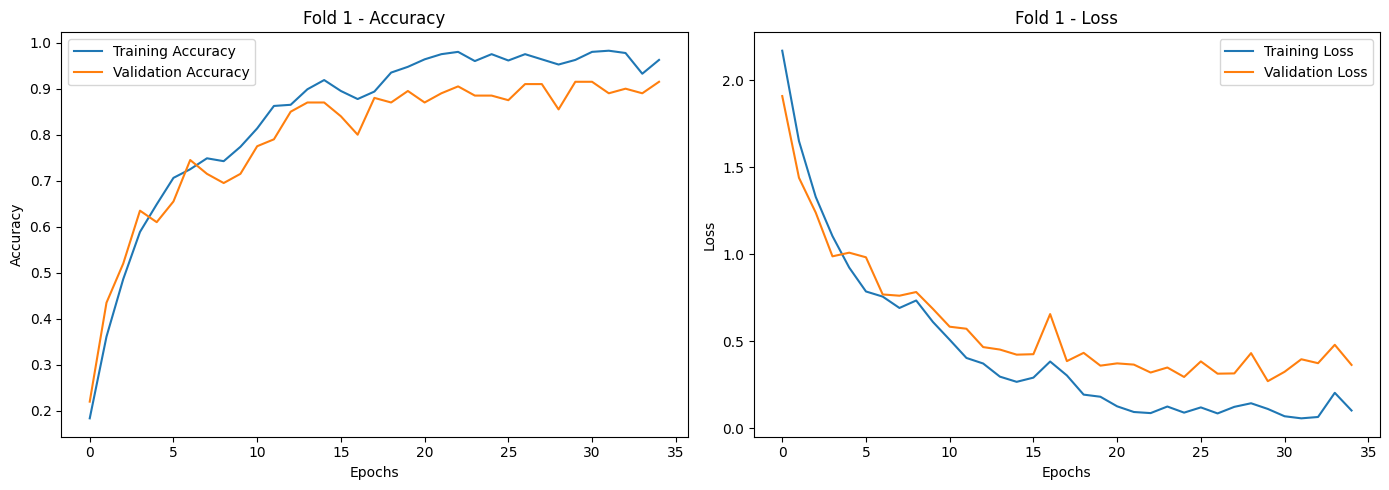

Training Fold 2...
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.1643 - loss: 2.2457 - val_accuracy: 0.2350 - val_loss: 1.8151
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3265 - loss: 1.7061 - val_accuracy: 0.4050 - val_loss: 1.4648
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4893 - loss: 1.3573 - val_accuracy: 0.5050 - val_loss: 1.1815
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5633 - loss: 1.1823 - val_accuracy: 0.5850 - val_loss: 1.0205
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6591 - loss: 0.9389 - val_accuracy: 0.7000 - val_loss: 0.8354
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7322 - loss: 0.7778 - val_accuracy: 0.7200 - val_loss: 0.7871
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7174 - loss: 0.7553 - val_accuracy: 0.7150 - val_loss: 0.7887
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7689 - loss: 0.6324 - val_a

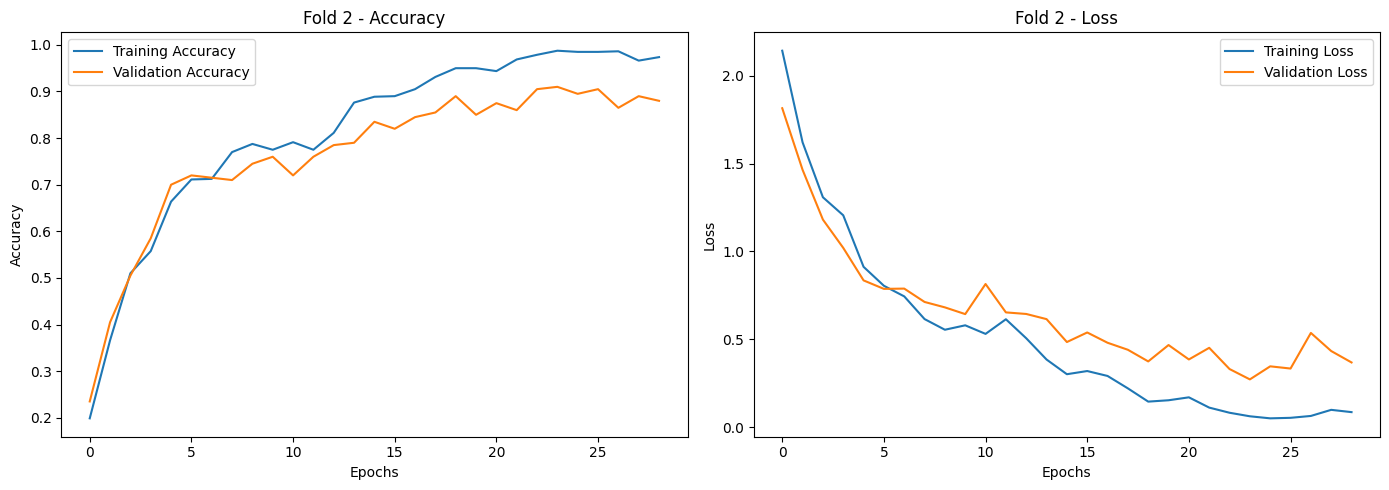

Training Fold 3...
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.1588 - loss: 2.2234 - val_accuracy: 0.3650 - val_loss: 1.8448
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.3678 - loss: 1.7096 - val_accuracy: 0.4200 - val_loss: 1.5038
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4964 - loss: 1.3213 - val_accuracy: 0.4750 - val_loss: 1.2836
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5315 - loss: 1.1712 - val_accuracy: 0.5500 - val_loss: 1.1477
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5883 - loss: 1.0539 - val_accuracy: 0.6550 - val_loss: 0.9100
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6120 - loss: 0.9453 - val_accuracy: 0.6150 - val_loss: 0.9099
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7120 - loss: 0.7724 - val_accuracy: 0.6950 - val_loss: 0.8563
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7054 - loss: 0.7217 - val_a

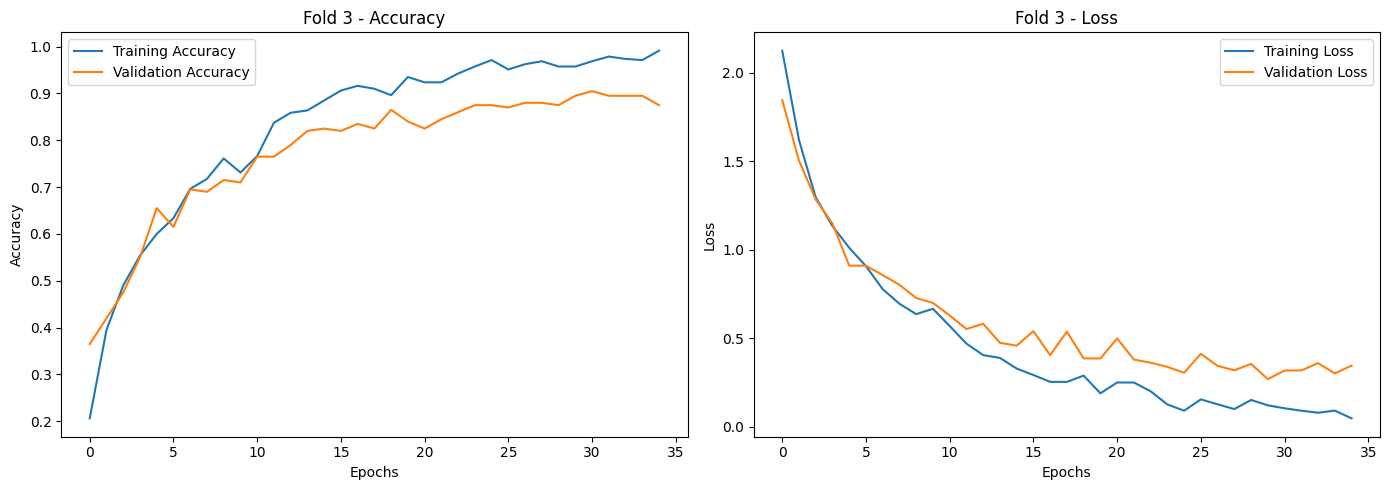

Training Fold 4...
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.1561 - loss: 2.2530 - val_accuracy: 0.2500 - val_loss: 1.8691
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.2944 - loss: 1.8294 - val_accuracy: 0.4550 - val_loss: 1.4573
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4371 - loss: 1.4148 - val_accuracy: 0.4900 - val_loss: 1.2868
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5588 - loss: 1.1943 - val_accuracy: 0.5750 - val_loss: 1.1651
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6333 - loss: 0.9879 - val_accuracy: 0.6100 - val_loss: 0.9449
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6795 - loss: 0.8475 - val_accuracy: 0.6750 - val_loss: 0.8660
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7150 - loss: 0.7719 - val_accuracy: 0.6750 - val_loss: 0.7903
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7554 - loss: 0.6555 - val_

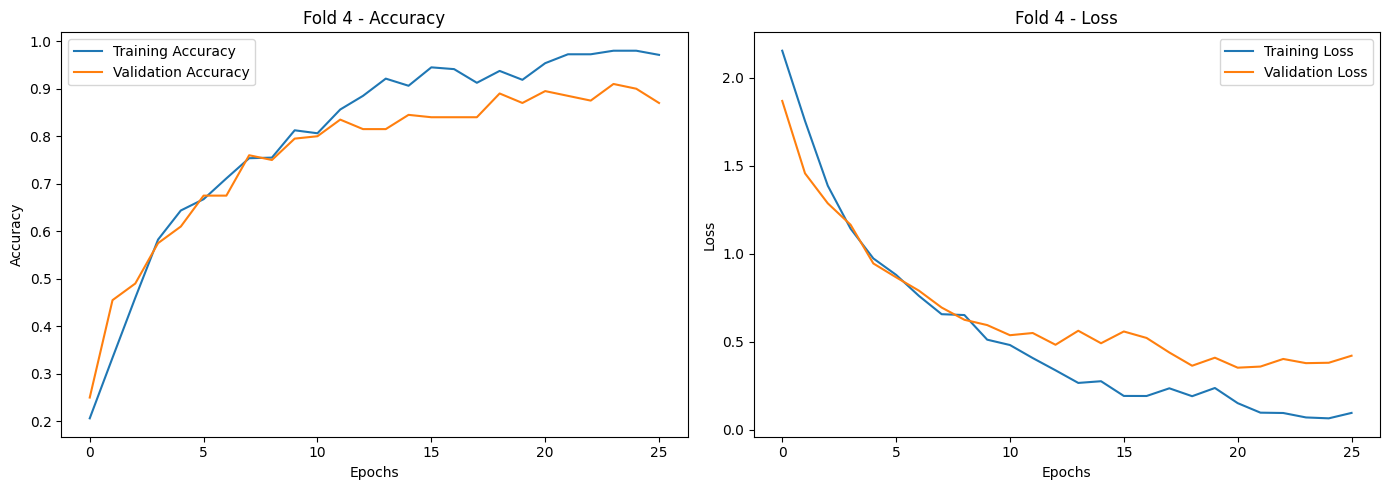

Training Fold 5...
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.1657 - loss: 2.2468 - val_accuracy: 0.2450 - val_loss: 1.9084
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3227 - loss: 1.7593 - val_accuracy: 0.5050 - val_loss: 1.4801
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4845 - loss: 1.5032 - val_accuracy: 0.4300 - val_loss: 1.3415
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5247 - loss: 1.2211 - val_accuracy: 0.5050 - val_loss: 1.1794
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6374 - loss: 1.0135 - val_accuracy: 0.6100 - val_loss: 0.9396
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7204 - loss: 0.7858 - val_accuracy: 0.6850 - val_loss: 0.7679
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7208 - loss: 0.6814 - val_accuracy: 0.6750 - val_loss: 0.8028
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7523 - loss: 0.6464 - val_a

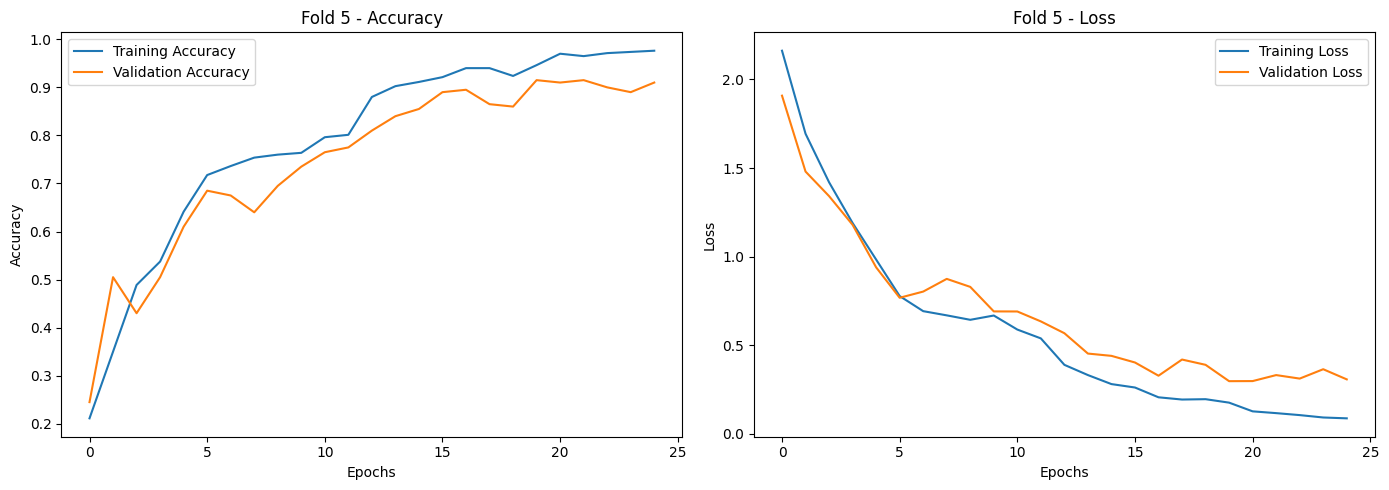

Average validation accuracy across folds: 0.9060000061988831
Standard deviation of validation accuracy: 0.009165171264303667


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt



# Path to the folder containing all CSV files for exercises
csv_folder_path = '/content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset'

# List of exercise folders (sub-folders in the dataset)
exercise_folders = [
    'Basic_Armraises', 'Basic_Biceps_Curl', 'Basic_Overhead_press', 'Birdog',
    'Burpee_v1.0', 'Crunch_v1.0', 'Hammer_curl_v1.0',
    'Tricep_kickback_left_v1.0', 'Tricep_kickback_right_v1.0', 'V_up_v1.0'
]

# Dictionary to store data with the exercise label as key
exercise_data = {}

# Loop over each exercise folder and read CSV files
for exercise in exercise_folders:
    exercise_path = os.path.join(csv_folder_path, exercise)
    print(f"Processing exercise folder: {exercise_path}")

    # Check if the directory exists
    if not os.path.exists(exercise_path):
        print(f"Directory not found: {exercise_path}")
        continue

    # Initialize a list for this exercise's data
    all_data_for_exercise = []

    # Get all CSV files for each repetition in the exercise folder
    csv_files = [f for f in os.listdir(exercise_path) if f.endswith('.csv')]

    # Limit to reading only 100 csv files
    csv_files = csv_files[:100]

    # Load each CSV file and store it
    for csv_file in csv_files:
        csv_file_path = os.path.join(exercise_path, csv_file)
        try:
            data = pd.read_csv(csv_file_path)
            all_data_for_exercise.append(data.values)  # Store as NumPy array
        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {csv_file_path}")

    # Store the data for this exercise in the dictionary
    exercise_data[exercise] = all_data_for_exercise

# Label Encoding for exercise labels
all_labels = []
for exercise_label in exercise_data.keys():
    all_labels.extend([exercise_label] * len(exercise_data[exercise_label]))

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(all_labels)

# Prepare the data (X) and labels (y)
X = []
for exercise_label, exercise_array in exercise_data.items():
    for repetition_data in exercise_array:
        # Pad or truncate repetition data to 250 time steps
        if repetition_data.shape[0] < 250:
            padding_shape = (250 - repetition_data.shape[0], repetition_data.shape[1])
            repetition_data = np.concatenate([repetition_data, np.zeros(padding_shape)])
        elif repetition_data.shape[0] > 250:
            repetition_data = repetition_data[:250, :]  # Truncate if more than 250 time steps

        X.append(repetition_data)

# Convert to numpy arrays
X = np.array(X)
y = np.array(encoded_labels)

# Reshape X to fit the model input shape (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Normalize the input data
X = X / np.max(np.abs(X), axis=1, keepdims=True)

# Define the improved Bidirectional LSTM model with Dropout and EarlyStopping
def create_model(input_shape, num_classes):
    model = models.Sequential()

    # Add Bidirectional LSTM layers with more units and dropout
    model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True), input_shape=input_shape))
    model.add(layers.Dropout(0.2))  # Dropout layer
    model.add(layers.Bidirectional(layers.LSTM(64)))
    model.add(layers.Dropout(0.2))

    # Dense layer before output
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Use StratifiedKFold for more balanced folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Convert labels to one-hot encoded vectors for all splits
num_classes = len(np.unique(y))
y_encoded = to_categorical(y, num_classes=num_classes)

# Store fold results
fold_accuracies = []
fold_losses = []

# K-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Training Fold {fold + 1}...")

    # Split data into training and validation for this fold
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # Create and compile model for this fold
    model = create_model(X_train.shape[1:], num_classes)

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_val, y_val)
    print(f"Validation Accuracy for Fold {fold + 1}: {val_acc}")
    fold_accuracies.append(val_acc)
    fold_losses.append(val_loss)

    # Plot training and validation accuracy
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold + 1} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold + 1} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Final cross-validation results
print(f"Average validation accuracy across folds: {np.mean(fold_accuracies)}")
print(f"Standard deviation of validation accuracy: {np.std(fold_accuracies)}")


**CNN+LSTM**

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.2280 - loss: 2.0325 - val_accuracy: 0.4963 - val_loss: 1.2694
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5796 - loss: 1.1506 - val_accuracy: 0.6333 - val_loss: 0.9459
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6611 - loss: 0.9045 - val_accuracy: 0.6537 - val_loss: 0.8735
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7084 - loss: 0.7687 - val_accuracy: 0.7685 - val_loss: 0.6526
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7694 - loss: 0.5855 - val_accuracy: 0.7685 - val_loss: 0.5609
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8266 - loss: 0.5035 - val_accuracy: 0.7963 - val_loss: 0.6107
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8159 - loss: 0.4933 - val_accuracy: 0.8315 - val_loss: 0.4611
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8508 - loss: 0.4129 - val_accuracy: 0.7981 - val_loss: 0.51

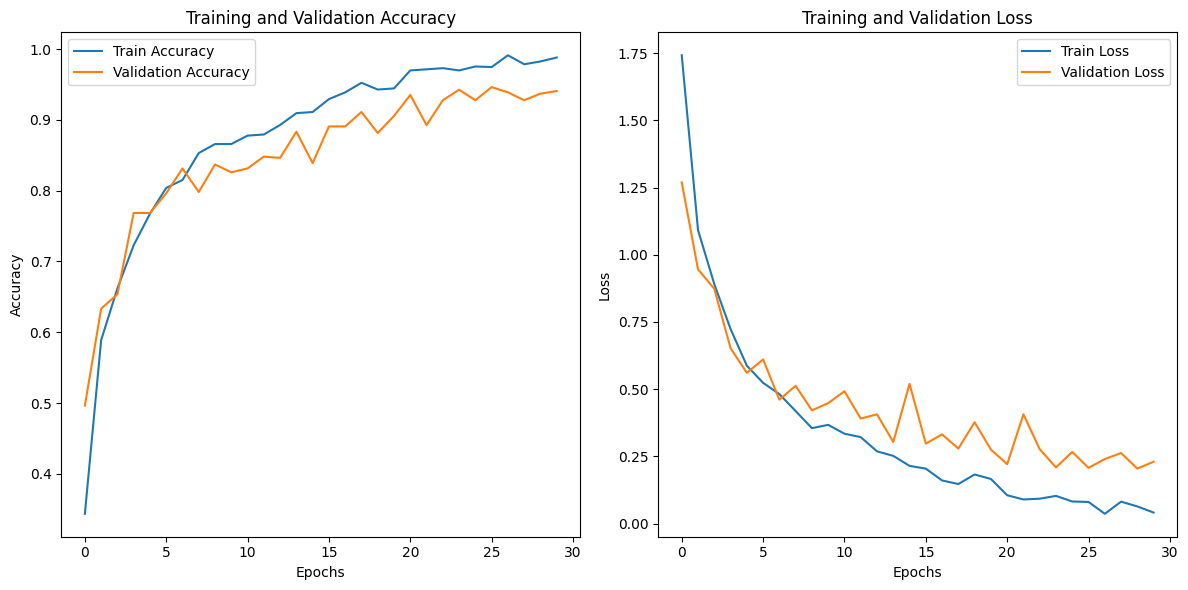

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Path to the folder containing all CSV files for exercises
csv_folder_path = '/content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset'

exercise_folders = [
    'Basic_Armraises', 'Basic_Biceps_Curl', 'Basic_Overhead_press', 'Birdog',
    'Burpee_v1.0', 'Crunch_v1.0', 'Hammer_curl_v1.0',
    'Tricep_kickback_left_v1.0', 'Tricep_kickback_right_v1.0', 'V_up_v1.0'
]

all_data = []
all_labels = []

# Load and preprocess data
for exercise in exercise_folders:
    exercise_path = os.path.join(csv_folder_path, exercise)
    csv_files = [f for f in os.listdir(exercise_path) if f.endswith('.csv')]

    for csv_file in csv_files:
        csv_file_path = os.path.join(exercise_path, csv_file)
        data = pd.read_csv(csv_file_path)
        data_without_time = data.iloc[:, 1:].values  # Exclude the first column (time)
        label = exercise

        all_data.append(data_without_time)
        all_labels.append(label)

# Pad sequences
max_length = 100  # Define max length for padding
X_padded = pad_sequences(all_data, padding='post', maxlen=max_length, dtype='float32')

# Convert labels to NumPy array
y = np.array(all_labels)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_padded.shape[2])).reshape(-1, max_length, X_padded.shape[2])
X_test = scaler.transform(X_test.reshape(-1, X_padded.shape[2])).reshape(-1, max_length, X_padded.shape[2])

# CNN + LSTM model
model = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(max_length, X_padded.shape[2])),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.3),
    layers.LSTM(64),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**Attention Mechanism**

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.0978 - loss: 3.1019 - val_accuracy: 0.2074 - val_loss: 2.2226 - learning_rate: 5.0000e-04
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2129 - loss: 2.5263 - val_accuracy: 0.2222 - val_loss: 2.1373 - learning_rate: 5.0000e-04
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2814 - loss: 2.2542 - val_accuracy: 0.2685 - val_loss: 2.0342 - learning_rate: 5.0000e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3266 - loss: 1.9992 - val_accuracy: 0.2981 - val_loss: 1.9249 - learning_rate: 5.0000e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3682 - loss: 1.9000 - val_accuracy: 0.3500 - val_loss: 1.7992 - learning_rate: 5.0000e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3693 - loss: 1.8372 - val_accuracy: 0.3907 - val_loss: 1.6810 - learning_rate: 5.0000e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4170 - loss

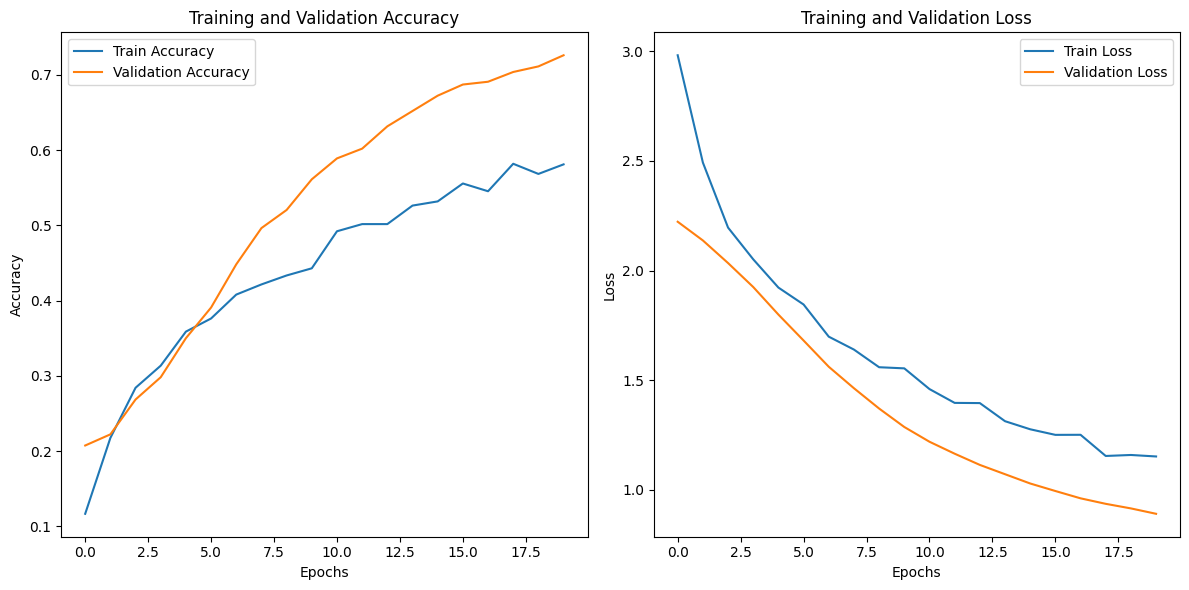

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import optimizers
import tensorflow as tf

# Path to the folder containing all CSV files for exercises
csv_folder_path = '/content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset'

exercise_folders = [
    'Basic_Armraises', 'Basic_Biceps_Curl', 'Basic_Overhead_press', 'Birdog',
    'Burpee_v1.0', 'Crunch_v1.0', 'Hammer_curl_v1.0',
    'Tricep_kickback_left_v1.0', 'Tricep_kickback_right_v1.0', 'V_up_v1.0'
]

all_data = []
all_labels = []

# Load and preprocess data
for exercise in exercise_folders:
    exercise_path = os.path.join(csv_folder_path, exercise)
    csv_files = [f for f in os.listdir(exercise_path) if f.endswith('.csv')]

    for csv_file in csv_files:
        csv_file_path = os.path.join(exercise_path, csv_file)
        data = pd.read_csv(csv_file_path)
        data_without_time = data.iloc[:, 1:].values  # Exclude the first column (time)
        label = exercise

        all_data.append(data_without_time)
        all_labels.append(label)

# Pad sequences
max_length = 100  # Define max length for padding
X_padded = pad_sequences(all_data, padding='post', maxlen=max_length, dtype='float32')

# Convert labels to NumPy array
y = np.array(all_labels)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_padded.shape[2])).reshape(-1, max_length, X_padded.shape[2])
X_test = scaler.transform(X_test.reshape(-1, X_padded.shape[2])).reshape(-1, max_length, X_padded.shape[2])

# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)

# Define the Attention Layer
class AttentionLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def call(self, inputs):
        query = inputs  # Query is the input sequence
        key = inputs  # Key is also the input sequence
        value = inputs  # Value is also the input sequence

        attention_scores = tf.keras.backend.batch_dot(query, tf.keras.backend.permute_dimensions(key, (0, 2, 1)))
        attention_scores = attention_scores / tf.math.sqrt(tf.cast(tf.shape(key)[-1], tf.float32))

        attention_weights = layers.Softmax(axis=-1)(attention_scores)
        context_vector = tf.keras.backend.batch_dot(attention_weights, value)

        return context_vector

# Build the model with Attention Layer
input_shape = (max_length, X_padded.shape[2])
inputs = layers.Input(shape=input_shape)
x = AttentionLayer()(inputs)  # Apply attention layer
x = layers.GlobalAveragePooling1D()(x)  # Global average pooling layer
x = layers.Dense(128, activation='relu')(x)  # Increased units for more complexity
x = layers.BatchNormalization()(x)  # Batch normalization layer
x = layers.Dropout(0.4)(x)  # Increased dropout rate to reduce overfitting
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)  # Batch normalization layer
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(len(label_encoder.classes_), activation='softmax')(x)

model = models.Model(inputs, outputs)

# Compile the model with an adjusted learning rate
optimizer = optimizers.Adam(learning_rate=0.0005)  # Adjust the learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Convert class_weights array to dictionary
class_weight_dict = dict(enumerate(class_weights))

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_reduction],
                    class_weight=class_weight_dict)  # Use the dictionary here

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2225 - loss: 2.1548 - val_accuracy: 0.4074 - val_loss: 1.6025 - learning_rate: 0.0010
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4587 - loss: 1.4665 - val_accuracy: 0.6093 - val_loss: 1.1913 - learning_rate: 0.0010
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5864 - loss: 1.1595 - val_accuracy: 0.6815 - val_loss: 0.9816 - learning_rate: 0.0010
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6803 - loss: 0.9491 - val_accuracy: 0.7426 - val_loss: 0.8077 - learning_rate: 0.0010
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7283 - loss: 0.7880 - val_accuracy: 0.7611 - val_loss: 0.7234 - learning_rate: 0.0010
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7854 - loss: 0.6198 - val_accuracy: 0.8074 - val_loss: 0.5825 - learning_rate: 0.0010
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8420 - loss: 0.4939 - val_acc

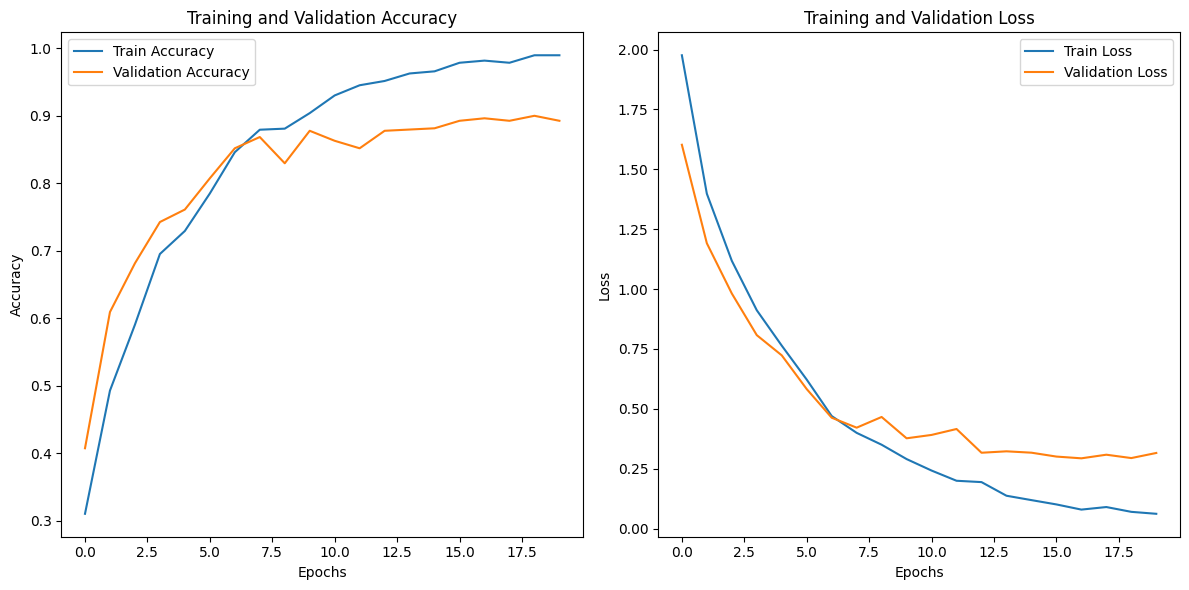

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import optimizers
import tensorflow as tf

# Path to the folder containing all CSV files for exercises
csv_folder_path = '/content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset'

exercise_folders = [
    'Basic_Armraises', 'Basic_Biceps_Curl', 'Basic_Overhead_press', 'Birdog',
    'Burpee_v1.0', 'Crunch_v1.0', 'Hammer_curl_v1.0',
    'Tricep_kickback_left_v1.0', 'Tricep_kickback_right_v1.0', 'V_up_v1.0'
]

all_data = []
all_labels = []

# Load and preprocess data
for exercise in exercise_folders:
    exercise_path = os.path.join(csv_folder_path, exercise)
    csv_files = [f for f in os.listdir(exercise_path) if f.endswith('.csv')]

    for csv_file in csv_files:
        csv_file_path = os.path.join(exercise_path, csv_file)
        data = pd.read_csv(csv_file_path)
        data_without_time = data.iloc[:, 1:].values  # Exclude the first column (time)
        label = exercise

        all_data.append(data_without_time)
        all_labels.append(label)

# Pad sequences
max_length = 100  # Define max length for padding
X_padded = pad_sequences(all_data, padding='post', maxlen=max_length, dtype='float32')

# Convert labels to NumPy array
y = np.array(all_labels)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_padded.shape[2])).reshape(-1, max_length, X_padded.shape[2])
X_test = scaler.transform(X_test.reshape(-1, X_padded.shape[2])).reshape(-1, max_length, X_padded.shape[2])

# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)

# Convert class_weights array to dictionary
class_weight_dict = dict(enumerate(class_weights))

# Define the Attention Layer
class AttentionLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def call(self, inputs):
        # Compute attention scores using query, key, value approach
        query = inputs  # Query is the input sequence
        key = inputs  # Key is also the input sequence
        value = inputs  # Value is also the input sequence

        # Calculate attention scores using tf.keras.backend.batch_dot
        attention_scores = tf.keras.backend.batch_dot(query, tf.keras.backend.permute_dimensions(key, (0, 2, 1)))
        attention_scores = attention_scores / tf.math.sqrt(tf.cast(tf.shape(key)[-1], tf.float32))

        # Apply softmax to get attention weights
        attention_weights = layers.Softmax(axis=-1)(attention_scores)

        # Calculate context vector
        context_vector = tf.keras.backend.batch_dot(attention_weights, value)

        return context_vector

# Build the model with Multi-Head LSTM + Attention Layer
input_shape = (max_length, X_padded.shape[2])
inputs = layers.Input(shape=input_shape)

# Multi-Head LSTM (three separate LSTM layers running in parallel)
lstm1 = layers.LSTM(64, return_sequences=True)(inputs)
lstm2 = layers.LSTM(64, return_sequences=True)(inputs)
lstm3 = layers.LSTM(64, return_sequences=True)(inputs)

# Concatenate outputs from each LSTM head
multi_head_output = layers.concatenate([lstm1, lstm2, lstm3])

# Apply Attention Mechanism
attention_output = AttentionLayer()(multi_head_output)

# Global pooling layer
x = layers.GlobalAveragePooling1D()(attention_output)

# Dense layers for classification
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(len(label_encoder.classes_), activation='softmax')(x)

# Define the model
model = models.Model(inputs, outputs)

# Compile the model with Adam optimizer
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_reduction],
                    class_weight=class_weight_dict)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1260, 100, 13)
X_test shape: (540, 100, 13)
y_train shape: (1260,)
y_test shape: (540,)


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# For reference about data

In [ ]:
# Path to the folder containing all CSV files for exercises
csv_folder_path = '/content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset'

# List of exercise folders (sub-folders in Only CSV files database_Infinity_AI)
exercise_folders = [
    'Basic_Armraises', 'Basic_Biceps_Curl', 'Basic_Overhead_press', 'Birdog',
    'Burpee_v1.0', 'Crunch_v1.0', 'Hammer_curl_v1.0',
    'Tricep_kickback_left_v1.0', 'Tricep_kickback_right_v1.0', 'V_up_v1.0'
]


all_data = []
all_labels = []
data_len=[]

# Loop over each exercise folder and read CSV files
for exercise in exercise_folders:
    exercise_path = os.path.join(csv_folder_path, exercise)
    print(f"Processing exercise folder: {exercise_path}")

    # Get all CSV files for each repetition in the exercise folder
    csv_files = [f for f in os.listdir(exercise_path) if f.endswith('.csv')]

    # Load each CSV file and append it to the all_data list
    for csv_file in csv_files:
        csv_file_path = os.path.join(exercise_path, csv_file)
        data = pd.read_csv(csv_file_path)

        # Assume label is derived from the exercise folder name
        label = exercise
        print(label)

        print(f"Number of observations in {csv_file}: {len(data)}")
        all_data.append(data.values)
        all_labels.append(label)
        data_len.append(len(data))

# Convert to NumPy arrays for easier manipulation
X = np.vstack(all_data)
y = np.array(all_labels)


Processing exercise folder: /content/drive/MyDrive/fitness_dataset/IMU Fitness Basic_armraises_Dataset/infinity_AI_dataset/Basic_Armraises
Basic_Armraises
Number of observations in 00025.csv: 361
Basic_Armraises
Number of observations in 00005.csv: 347
Basic_Armraises
Number of observations in 00016.csv: 678
Basic_Armraises
Number of observations in 00001.csv: 516
Basic_Armraises
Number of observations in 00015.csv: 631
Basic_Armraises
Number of observations in 00021.csv: 282
Basic_Armraises
Number of observations in 00012.csv: 297
Basic_Armraises
Number of observations in 00011.csv: 876
Basic_Armraises
Number of observations in 00024.csv: 914
Basic_Armraises
Number of observations in 00009.csv: 625
Basic_Armraises
Number of observations in 00003.csv: 336
Basic_Armraises
Number of observations in 00013.csv: 776
Basic_Armraises
Number of observations in 00026.csv: 665
Basic_Armraises
Number of observations in 00008.csv: 802
Basic_Armraises
Number of observations in 00010.csv: 706
Basic_

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


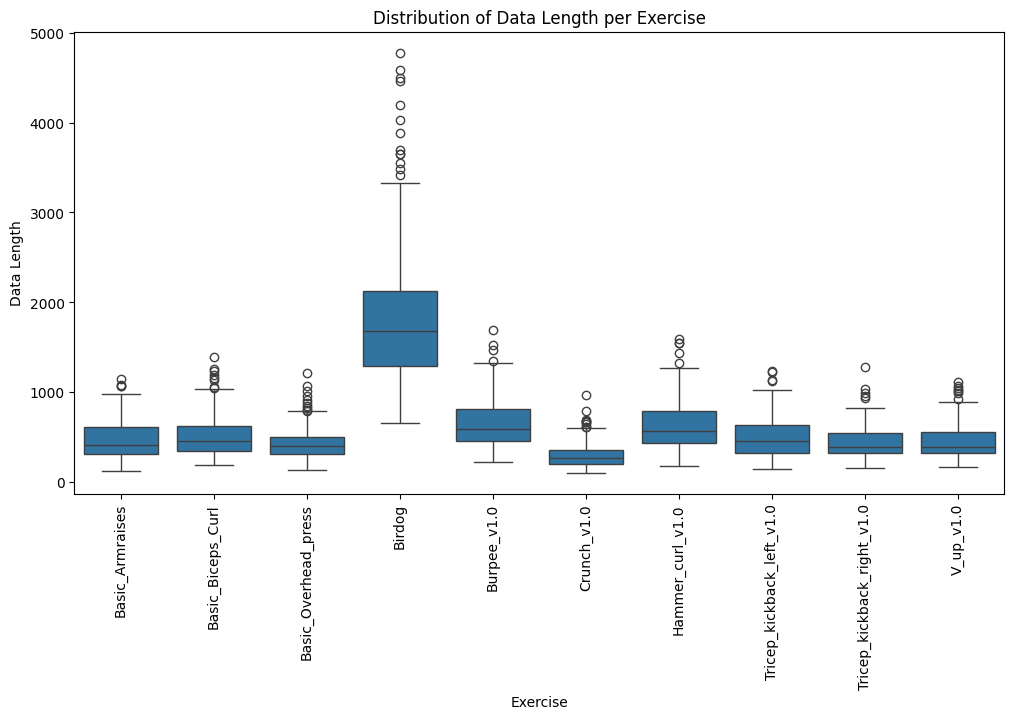

In [ ]:
# generate the distribution plot for data_len with respect to exercises

import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store the data lengths and corresponding exercise labels
data_len_df = pd.DataFrame({'Data Length': data_len, 'Exercise': all_labels})

# Create a distribution plot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exercise', y='Data Length', data=data_len_df)
plt.xticks(rotation=90)
plt.title('Distribution of Data Length per Exercise')
plt.xlabel('Exercise')
plt.ylabel('Data Length')
plt.show()


In [ ]:
# calculate the mean value of data length or each exercise

# Group by exercise and calculate the mean data length
mean_data_len_by_exercise = data_len_df.groupby('Exercise')['Data Length'].mean()

print(mean_data_len_by_exercise)

Exercise
Basic_Armraises                478.180
Basic_Biceps_Curl              506.320
Basic_Overhead_press           430.230
Birdog                        1858.990
Burpee_v1.0                    651.905
Crunch_v1.0                    303.755
Hammer_curl_v1.0               630.310
Tricep_kickback_left_v1.0      507.570
Tricep_kickback_right_v1.0     451.750
V_up_v1.0                      458.300
Name: Data Length, dtype: float64


In [ ]:
print(X.shape)
print(y.shape)

(1159530, 14)
(1800,)


In [ ]:
print(y)

['Basic_Armraises' 'Basic_Armraises' 'Basic_Armraises' ... 'V_up_v1.0'
 'V_up_v1.0' 'V_up_v1.0']


In [ ]:
# prompt: count number of unique labels in each label category in y

from collections import Counter

label_counts = Counter(y)
print(label_counts)


Counter({'Basic_Armraises': 200, 'Basic_Biceps_Curl': 200, 'Basic_Overhead_press': 200, 'Birdog': 200, 'Burpee_v1.0': 200, 'Crunch_v1.0': 200, 'Hammer_curl_v1.0': 200, 'V_up_v1.0': 200, 'Tricep_kickback_left_v1.0': 100, 'Tricep_kickback_right_v1.0': 100})


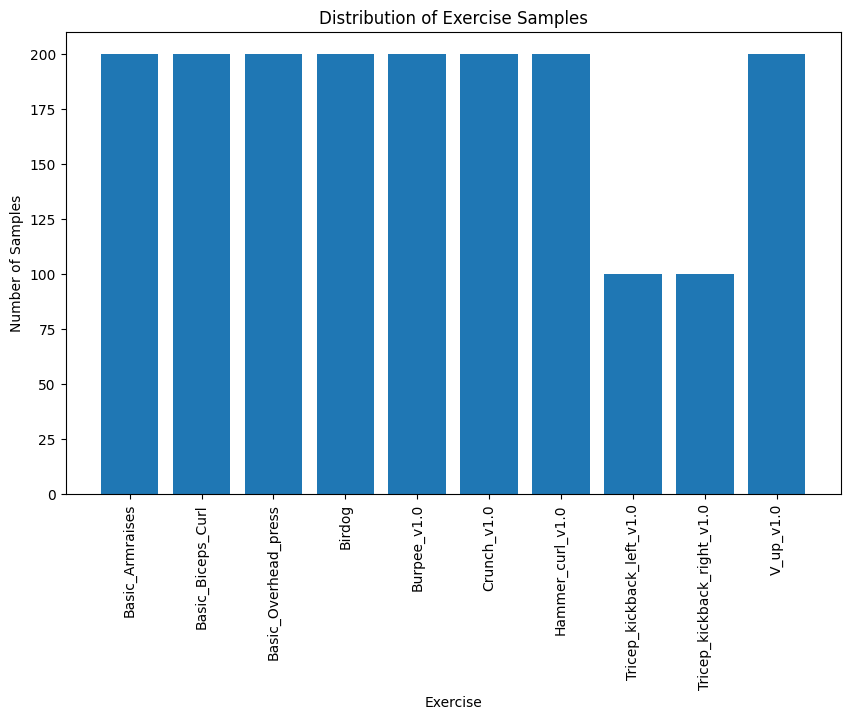

In [ ]:
# prompt: bar plot label_counts

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Exercise")
plt.ylabel("Number of Samples")
plt.title("Distribution of Exercise Samples")
plt.xticks(rotation=90)
plt.show()


In [ ]:


# Build a simple DNN model
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Display classification report and accuracy
print(classification_report(y_test, y_pred_classes))
print(f"Accuracy: {accuracy_score(y_test, y_pred_classes)}")